<a href="https://colab.research.google.com/github/Olesya002/ML_course/blob/main/13_statement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Загрузим выборку из файла

In [ ]:
data = pd.read_csv('gbm-data.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


# Преобразуем её в массив numpy

In [ ]:
data_array = data.values
data_array

array([[1.        , 0.        , 0.49700901, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.36666667, 0.60629148, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.0333    , 0.48012427, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.2       , 0.52056377, ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.1       , 0.7656462 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.13333333, 0.53395198, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X, y = data_array[:, 1:], data_array[:, 0]

# Разобъем выборку на обучающую и тестовую

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 241)

# 2. Обучим классификатор для градиентного бустинга

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
learning_rate = [1, 0.5, 0.3, 0.2, 0.1]

# Для каждого значения learning rate:

In [ ]:
from sklearn.metrics import log_loss

In [ ]:
# преобразование предсказания сигмоида
def formula(x):
  return 1 / (1 + np.exp(-1 * x))


In [ ]:
# функция возвращает предсказания качества на обучающей и тестовой выборках на каждой итерации
def gradient_boosting(rate):
  clf = GradientBoostingClassifier(n_estimators=250, verbose = True, random_state = 241, learning_rate = rate)
  clf.fit(X_train, y_train)
  y_pred_train = clf.staged_decision_function(X_train)
  y_pred_test = clf.staged_decision_function(X_test)
  return y_pred_train, y_pred_test

In [ ]:
# функция возвращает значения log-loss на каждой итерации
def loss_iter(decision, y, rate):
  loss = []
  for j in decision:
    y_pred = formula(j)
    loss.append(log_loss(y, y_pred))
  return loss

      Iter       Train Loss   Remaining Time 
         1           1.0190           19.93s
         2           0.9192           19.77s
         3           0.8272           19.80s
         4           0.7834           19.59s
         5           0.7109           19.19s
         6           0.6368           18.87s
         7           0.5797           18.68s
         8           0.5610           18.51s
         9           0.5185           18.39s
        10           0.4984           18.25s
        20           0.1999           17.33s
        30           0.1313           16.33s
        40           0.0790           15.47s
        50           0.0511           13.74s
        60           0.0352           12.41s
        70           0.0245           11.36s
        80           0.0162           10.43s
        90           0.0114            9.60s
       100           0.0077            8.82s
       200           0.0002            2.68s


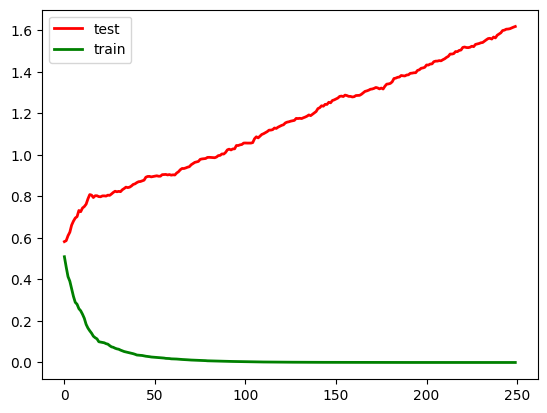

Learning rate = 1
Минимальное значение метрики train: 1.7088258292514574e-05
Номер итерации: 250
Минимальное значение метрики test: 0.5822942594278475
Номер итерации: 1
      Iter       Train Loss   Remaining Time 
         1           1.1255           17.88s
         2           1.0035           17.40s
         3           0.9386           17.19s
         4           0.8844           17.14s
         5           0.8381           17.15s
         6           0.7995           17.53s
         7           0.7559           17.71s
         8           0.7205           17.86s
         9           0.6958           17.86s
        10           0.6725           17.76s
        20           0.4672           16.86s
        30           0.3179           16.13s
        40           0.2274           14.53s
        50           0.1774           13.01s
        60           0.1394           11.93s
        70           0.1050           12.55s
        80           0.0805           11.43s
        90          

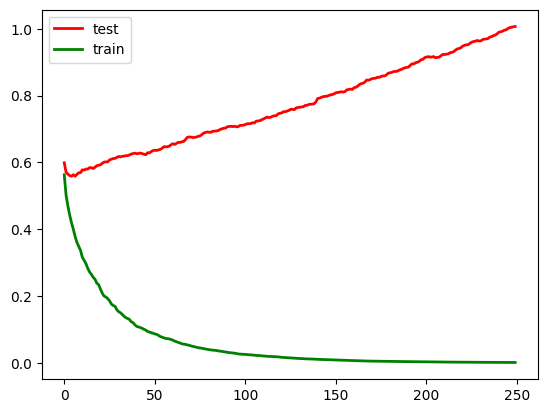

Learning rate = 0.5
Минимальное значение метрики train: 0.0010223231814672723
Номер итерации: 250
Минимальное значение метрики test: 0.5584259973942154
Номер итерации: 7
      Iter       Train Loss   Remaining Time 
         1           1.2095           18.20s
         2           1.1006           17.82s
         3           1.0240           18.47s
         4           0.9729           18.34s
         5           0.9387           18.24s
         6           0.8948           18.02s
         7           0.8621           18.00s
         8           0.8360           17.86s
         9           0.8171           18.07s
        10           0.7883           18.03s
        20           0.6029           16.16s
        30           0.4760           13.91s
        40           0.3879           12.47s
        50           0.3325           11.46s
        60           0.2759           10.60s
        70           0.2304            9.83s
        80           0.1969            9.15s
        90         

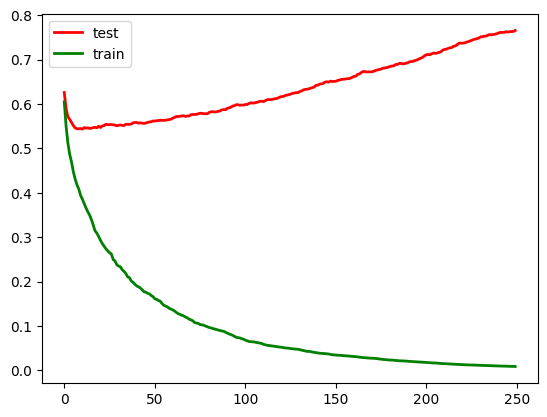

Learning rate = 0.3
Минимальное значение метрики train: 0.008829670224905706
Номер итерации: 250
Минимальное значение метрики test: 0.5432835808866866
Номер итерации: 11
      Iter       Train Loss   Remaining Time 
         1           1.2613           17.59s
         2           1.1715           17.56s
         3           1.1009           17.75s
         4           1.0529           17.66s
         5           1.0130           17.66s
         6           0.9740           17.61s
         7           0.9475           17.42s
         8           0.9197           17.35s
         9           0.8979           17.50s
        10           0.8730           17.62s
        20           0.7207           15.29s
        30           0.6055           13.35s
        40           0.5244           12.12s
        50           0.4501           11.25s
        60           0.3908           10.42s
        70           0.3372            9.71s
        80           0.3009            9.05s
        90         

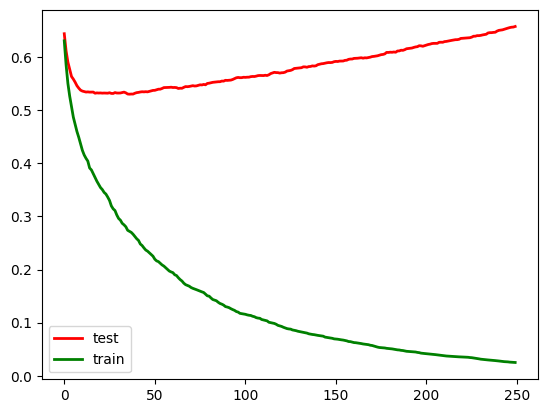

Learning rate = 0.2
Минимальное значение метрики train: 0.024906124477548815
Номер итерации: 250
Минимальное значение метрики test: 0.5301645204906471
Номер итерации: 37
      Iter       Train Loss   Remaining Time 
         1           1.3199           17.67s
         2           1.2645           17.69s
         3           1.2170           18.43s
         4           1.1775           19.04s
         5           1.1404           18.66s
         6           1.1106           18.77s
         7           1.0844           18.74s
         8           1.0617           18.50s
         9           1.0411           18.05s
        10           1.0223           17.33s
        20           0.8864           13.93s
        30           0.7844           12.49s
        40           0.7176           11.52s
        50           0.6590           10.76s
        60           0.6120           10.09s
        70           0.5599            9.45s
        80           0.5242            8.82s
        90         

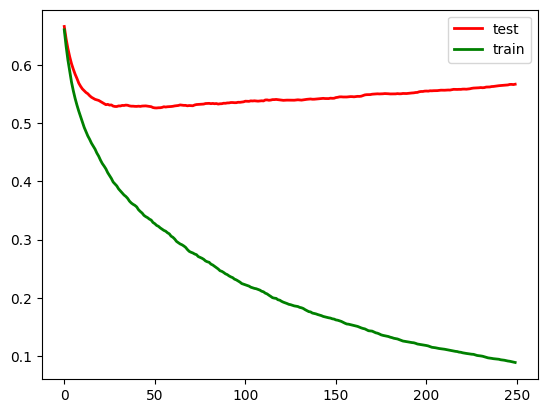

Learning rate = 0.1
Минимальное значение метрики train: 0.08936962416274087
Номер итерации: 250
Минимальное значение метрики test: 0.5259049090698129
Номер итерации: 52


In [ ]:
# нарисуем графики
for i in learning_rate:
  decision_train, decision_test = gradient_boosting(i)
  train_loss = loss_iter(decision_train, y_train, i)
  test_loss = loss_iter(decision_test, y_test, i)
  plt.figure()
  plt.plot(test_loss, 'r', linewidth = 2)
  plt.plot(train_loss, 'g', linewidth = 2)
  plt.legend(['test', 'train'])
  plt.show()
  print(f'Learning rate = {i}')
  print('Минимальное значение метрики train:', min(train_loss))
  print('Номер итерации:', train_loss.index(min(train_loss))+1)
  print('Минимальное значение метрики test:', min(test_loss))
  print('Номер итерации:', test_loss.index(min(test_loss))+1)

# 3. Как можно охарактеризовать график качества на тестовой выборке?

---> overfitting. Ошибка уменьшается на обучающей выборке, но растет на новых данных - свидетельство переобучения;

# 4. Минимальное значение log-loss на тестовой выборке и номер итерации при learning_rate = 0.2

In [ ]:
dec_train, dec_test = gradient_boosting(0.2)
test_loss_1 = loss_iter(dec_test, y_test, 0.2)
print('Минимальное значение метрики test:', min(test_loss_1))
print('Номер итерации:', test_loss_1.index(min(test_loss_1))+1)

      Iter       Train Loss   Remaining Time 
         1           1.2613           11.87s
         2           1.1715           11.82s
         3           1.1009           11.66s
         4           1.0529           12.01s
         5           1.0130           11.99s
         6           0.9740           11.87s
         7           0.9475           11.77s
         8           0.9197           11.71s
         9           0.8979           11.71s
        10           0.8730           11.65s
        20           0.7207           11.12s
        30           0.6055           10.56s
        40           0.5244           10.17s
        50           0.4501            9.69s
        60           0.3908            9.56s
        70           0.3372            9.59s
        80           0.3009            9.50s
        90           0.2603            9.20s
       100           0.2327            8.83s
       200           0.0835            2.77s
Минимальное значение метрики test: 0.5301645204906471


# 5. Обучим RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf_1 = RandomForestClassifier(n_estimators=200, random_state = 241)

In [ ]:
clf_1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=241)

In [ ]:
prediction = clf_1.predict_proba(X_test)

In [ ]:
log_loss(y_test, prediction)
# почти такое же как минимальное из 4-ого пункта

0.5260089729018116